In [17]:
import matplotlib.pyplot as plt
import numpy as np!pip install gudhi

In [19]:
!pip install gudhi

   ---------------------------------------- 0.0/3.4 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.4 MB 3.4 MB/s eta 0:00:01
   ------------ --------------------------- 1.0/3.4 MB 3.4 MB/s eta 0:00:01
   ------------ --------------------------- 1.0/3.4 MB 3.4 MB/s eta 0:00:01
   ------------ --------------------------- 1.0/3.4 MB 3.4 MB/s eta 0:00:01
   --------------- ------------------------ 1.3/3.4 MB 1.0 MB/s eta 0:00:02
   --------------------- ------------------ 1.8/3.4 MB 1.4 MB/s eta 0:00:02
   ------------------------ --------------- 2.1/3.4 MB 1.5 MB/s eta 0:00:01
   ------------------------ --------------- 2.1/3.4 MB 1.5 MB/s eta 0:00:01
   ------------------------------ --------- 2.6/3.4 MB 1.3 MB/s eta 0:00:01
   ------------------------------------- -- 3.1/3.4 MB 1.4 MB/s eta 0:00:01
   ------------------------------------- -- 3.1/3.4 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 3.4/3.4 MB 1.3 MB/s eta 0:00:00


In [39]:
import gudhi

Begin with defining functions for generating and plotting the circles


In [3]:
def generate_noisy_circle(n=200, radius=1, center=(0, 0), noise_std=0.1):
    theta = np.random.uniform(0.0, 2.0 * np.pi, size=n)
    ux = np.cos(theta)
    uy = np.sin(theta)
    cx, cy = center
    base = np.column_stack([cx + radius * ux, cy + radius * uy])
    noise = np.random.rand(n,2)
    points = base + noise_std*radius*noise
    return points

def generate_nested_noisy_circles(n=200, radius_in=1, radius_out=2, center=(0, 0), noise_std=0.1):
    return generate_noisy_circle(radius = radius_in), generate_noisy_circle(radius=radius_out)

def generate_disjoint_noisy_circles(n=200, radius=1, center_1=(0, 0), center_2=(4,0), noise_std=0.1):
    return generate_noisy_circle(center=center_1), generate_noisy_circle(center=center_2)

def generate_adjacent_noisy_circles(n=200, radius=1, center_1=(0, 0), center_2=(2,0), noise_std=0.1):
    return generate_noisy_circle(center=center_1), generate_noisy_circle(center=center_2)

In [5]:
def plot_noisy_circles(points_1, points_2, title="Noisy Circle"):
    plt.figure(figsize=(6, 6))
    plt.scatter(points_1[:, 0], points_1[:, 1], s=30, c="#1f77b4")
    plt.scatter(points_2[:, 0], points_2[:, 1], s=30, c="#1f77b4")
    plt.gca().set_aspect("equal", "box")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.title(title)
    plt.tight_layout()
    plt.show()

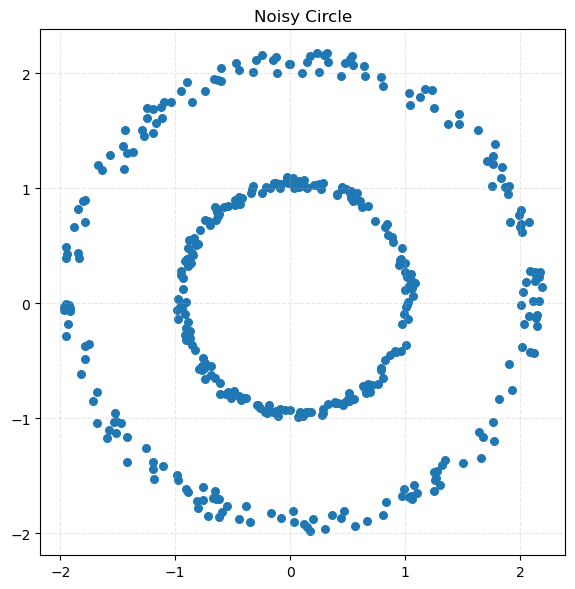

In [45]:
points_1,points_2 = generate_nested_noisy_circles(n=200, radius_in=1, radius_out=2, center=(0, 0), noise_std=0.1)
plot_noisy_circles(points_1,points_2)

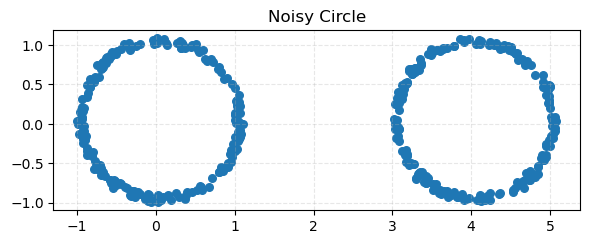

In [48]:
points_1, points_2 = generate_disjoint_noisy_circles()
plot_noisy_circles(points_1,points_2)

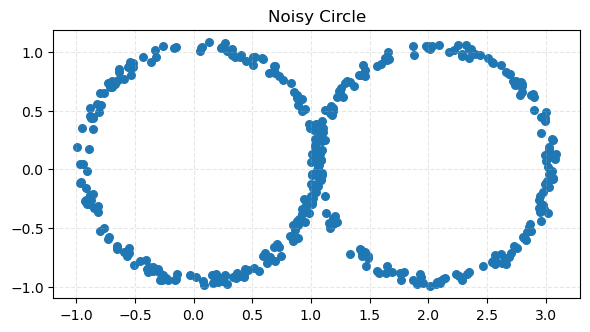

In [50]:
points_1, points_2 = generate_adjacent_noisy_circles()
plot_noisy_circles(points_1,points_2)

## Question i\)


In [109]:
sample_size = 100
data = []
for i in range(sample_size):
    points_1, points_2 = generate_nested_noisy_circles()
    data.append(points_1+points_2)
    points_1, points_2 = generate_disjoint_noisy_circles()
    data.append(points_1+points_2)
    points_1, points_2 = generate_adjacent_noisy_circles()
    data.append(points_1+points_2)

## Question ii)

Following this notebook
https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-representations.ipynb

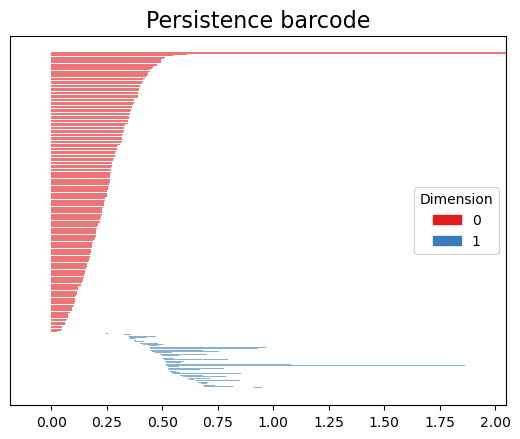

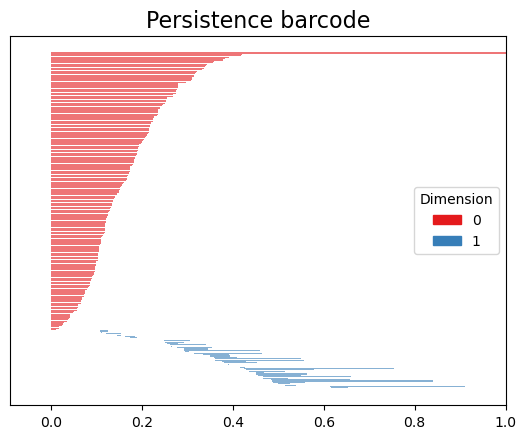

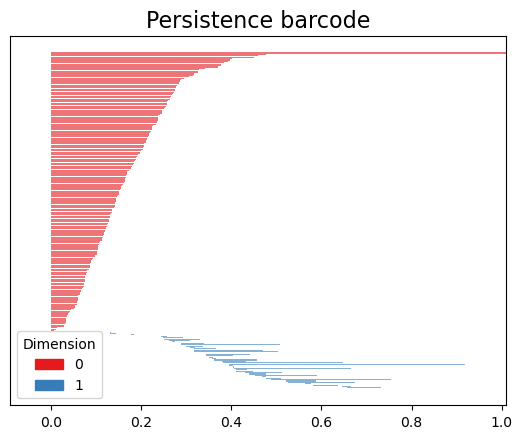

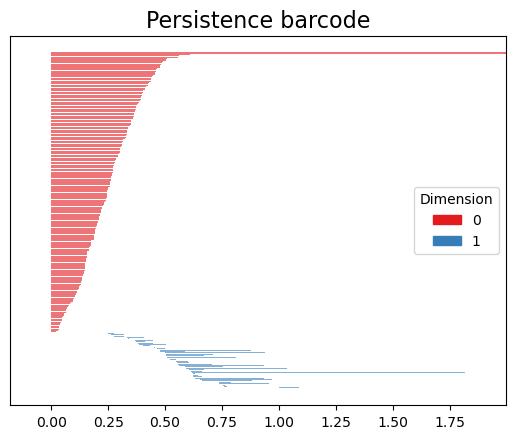

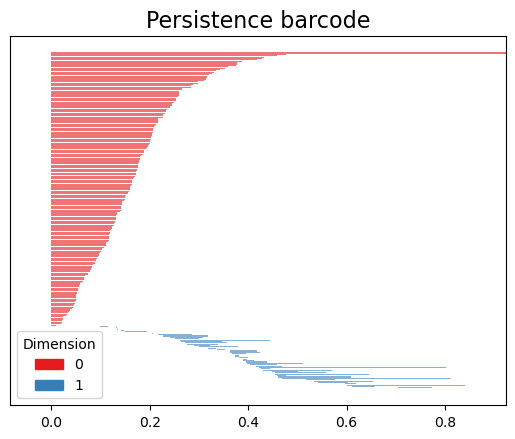

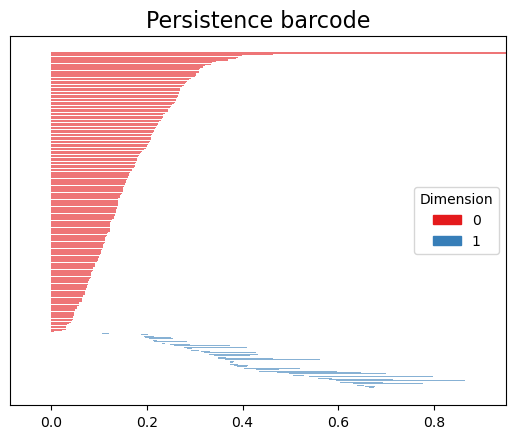

KeyboardInterrupt: 

In [93]:
for i in range(0, 300):
    rips_complex = gudhi.RipsComplex(points = data[i])
    st = rips_complex.create_simplex_tree(max_dimension=2)
    PH = st.persistence()
    gudhi.plot_persistence_barcode(PH, legend=True)
    plt.show()

In [119]:
H0 = st.persistence_intervals_in_dimension(0)
H1 = st.persistence_intervals_in_dimension(1)

In [131]:
from gudhi.representations import Landscape

ls = Landscape(
    num_landscapes=5,
    resolution=100
)

vec_H1 = ls.fit_transform([H1])[0]

In [135]:
features = []

for points in data:
    rips = gudhi.RipsComplex(points=points)
    st = rips.create_simplex_tree(max_dimension=2)
    st.persistence()
    
    H1 = st.persistence_intervals_in_dimension(1)
    vec = ls.fit_transform([H1])[0]
    features.append(vec)

X = np.array(features)

In [137]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)

C:\Users\brice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


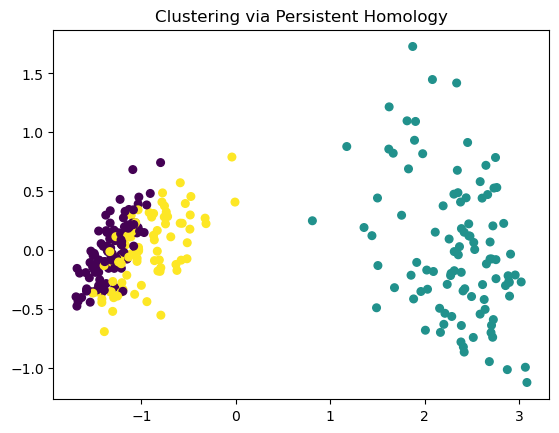

In [139]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_red = PCA(n_components=2).fit_transform(X)

plt.scatter(X_red[:,0], X_red[:,1], c=labels, s=30)
plt.title("Clustering via Persistent Homology")
plt.show()

In [141]:
def persistence_diagrams(points):
    rips = gudhi.RipsComplex(points=points)
    st = rips.create_simplex_tree(max_dimension=2)
    st.persistence()
    
    H0 = st.persistence_intervals_in_dimension(0)
    H1 = st.persistence_intervals_in_dimension(1)
    return H0, H1

In [149]:
from gudhi.representations import PersistenceImage

PI = PersistenceImage(
    bandwidth=0.05,
    weight=lambda bd: bd[1] - bd[0],
    resolution=[20, 20]
)


In [151]:
features = []

for points in data:
    _, H1 = persistence_diagrams(points)
    vec = PI.fit_transform([H1])[0]
    features.append(vec)

X = np.array(features)   # shape (300, d)


In [152]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)


C:\Users\brice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


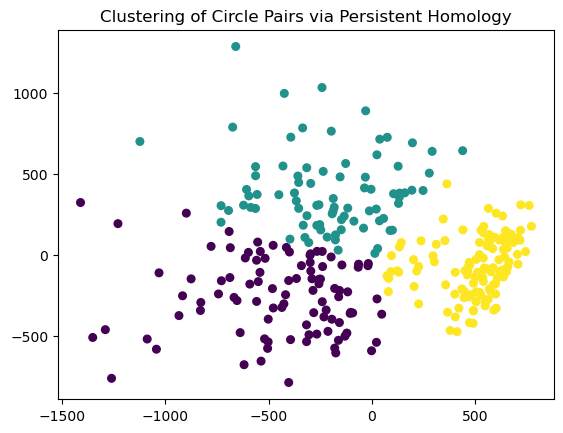

In [153]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_red = PCA(n_components=2).fit_transform(X)

plt.scatter(X_red[:,0], X_red[:,1], c=labels, s=30)
plt.title("Clustering of Circle Pairs via Persistent Homology")
plt.show()


## Question iii)

## Question iv)

In [178]:
def generate_random_points(n=10, xlim=(-1.0, 1.0), ylim=(-1.0, 1.0)):
    x = np.random.uniform(xlim[0], xlim[1], size=n)
    y = np.random.uniform(ylim[0], ylim[1], size=n)
    return np.column_stack([x, y])

def add_outliers(points, n_outliers=20, box_size=1.0):
    outliers = np.random.uniform(low=-box_size, high=box_size, size=(n_outliers, 2))
    return np.vstack([points, outliers])

def plot_noisy_circle(points, title="Noisy Circle"):
    plt.figure(figsize=(6, 6))
    plt.scatter(points[:, 0], points[:, 1], s=30, c="#1f77b4")
    plt.gca().set_aspect("equal", "box")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.title(title)
    plt.tight_layout()
    plt.show()

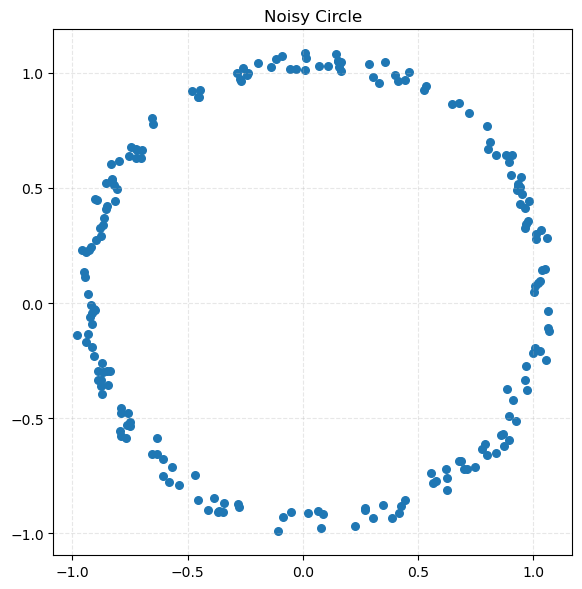

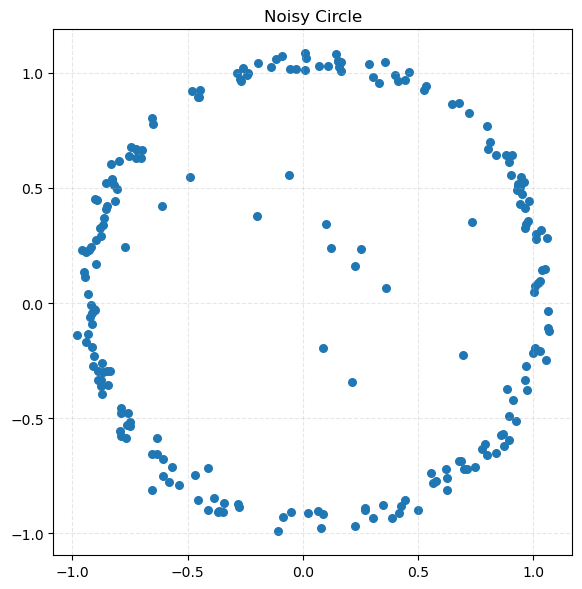

(None, None)

In [184]:
P1 = generate_noisy_circle()
P2 = add_outliers(P1)
plot_noisy_circle(P1), plot_noisy_circle(P2)

In [186]:
def compute_persistence(points):
    rips = gudhi.RipsComplex(points=points)
    st = rips.create_simplex_tree(max_dimension=2)
    st.persistence()
    return st.persistence()

PH1 = compute_persistence(P1)
PH2 = compute_persistence(P2)

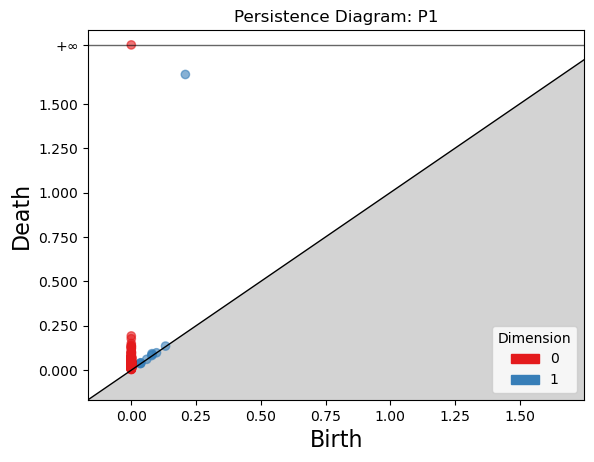

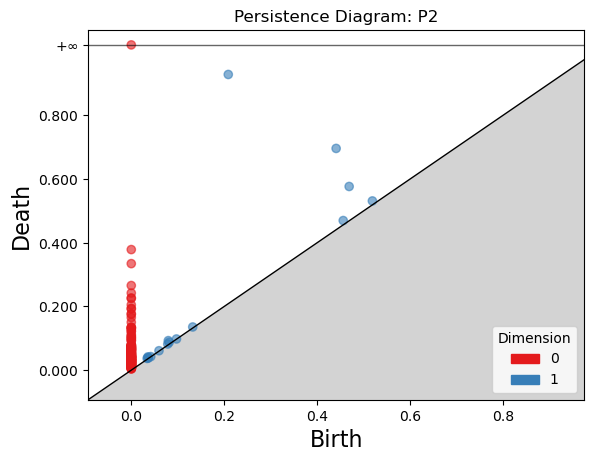

In [188]:
gudhi.plot_persistence_diagram(PH1)
plt.title("Persistence Diagram: P1")
plt.show()

gudhi.plot_persistence_diagram(PH2)
plt.title("Persistence Diagram: P2")
plt.show()


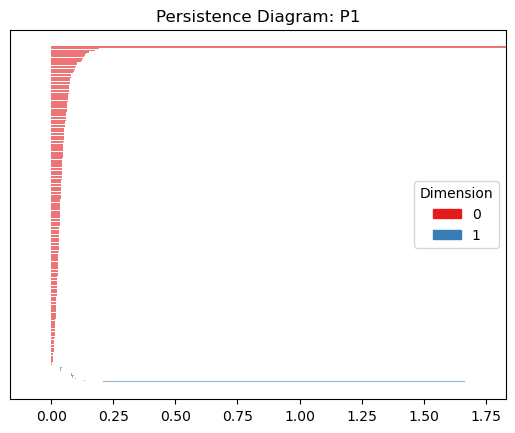

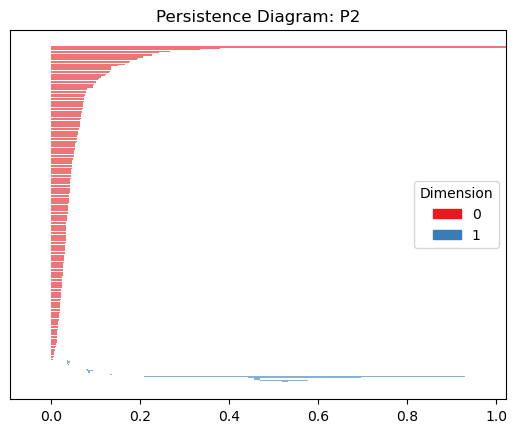

In [190]:
gudhi.plot_persistence_barcode(PH1)
plt.title("Persistence Diagram: P1")
plt.show()

gudhi.plot_persistence_barcode(PH2)
plt.title("Persistence Diagram: P2")
plt.show()